1) Predict emotion scores for all lines in the data
2) For each season
- Plot the distribution of all emotion labels in that season
3) For each emotion label
- Plot the relative frequency of each emotion across all seasons

In [1]:
%pip install --upgrade pip
%pip install transformers
%pip install tf_keras
%pip install tensorflow
%pip install pandas
%pip install numpy
%pip install torch


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

In [1]:
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer
import pandas as pd
import numpy as np

2024-04-16 13:54:39.880955: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 13:54:41.130791: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Shorten the dataframe

In [2]:
#specify your filename
file_name = "../../../../../cds-lang-data/GoT-scripts/Game_of_Thrones_Script.csv"  # note: you can right-click on your file and copy-paste the path to it here
text_column = "Sentence"  # select the column in your csv that contains the text to be classified

# read in csv
df_pred = pd.read_csv(file_name)
df_first_20 = df_pred.head(20) 

pred_texts_20 = df_first_20[text_column].dropna().astype('str').tolist()


In [3]:
df_first_20

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.
5,2011-04-17,Season 1,Episode 1,Winter is Coming,royce,Do the dead frighten you?
6,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,Our orders were to track the wildlings. We tra...
7,2011-04-17,Season 1,Episode 1,Winter is Coming,royce,You don't think he'll ask us how they died? Ge...
8,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Whatever did it to them could do it to us. The...
9,2011-04-17,Season 1,Episode 1,Winter is Coming,royce,It's a good thing we're not children. You want...


In [4]:
pred_texts_20

["What do you expect? They're savages. One lot steals a goat from another lot and before you know it, they're ripping each other to pieces.",
 "I've never seen wildlings do a thing like this. I've never seen a thing like this, not ever in my life.",
 'How close did you get?',
 'Close as any man would.',
 'We should head back to the wall.',
 'Do the dead frighten you?',
 "Our orders were to track the wildlings. We tracked them. They won't trouble us no more.",
 "You don't think he'll ask us how they died? Get back on your horse.",
 'Whatever did it to them could do it to us. They even killed the children.',
 "It's a good thing we're not children. You want to run away south, run away. Of course, they will behead you as a deserter … If I don't catch you first. Get back on your horse. I won't say it again.",
 'Your dead men seem to have moved camp.',
 'They were here.',
 'See where they went.',
 'What is it?',
 "It's …",
 "Go on. Father's watching.",
 'And your mother.',
 'Fine work, as al

In [6]:
classifier = pipeline("text-classification", 
                      model="j-hartmann/emotion-english-distilroberta-base", 
                      return_all_scores=True)

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

/home/ucloud/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [7]:
classifier(pred_texts_20)

[[{'label': 'anger', 'score': 0.0947076603770256},
  {'label': 'disgust', 'score': 0.8400837182998657},
  {'label': 'fear', 'score': 0.005907748825848103},
  {'label': 'joy', 'score': 0.001032969681546092},
  {'label': 'neutral', 'score': 0.042989734560251236},
  {'label': 'sadness', 'score': 0.004523616749793291},
  {'label': 'surprise', 'score': 0.01075451634824276}],
 [{'label': 'anger', 'score': 0.07611250877380371},
  {'label': 'disgust', 'score': 0.6117002367973328},
  {'label': 'fear', 'score': 0.018281610682606697},
  {'label': 'joy', 'score': 0.0030897101387381554},
  {'label': 'neutral', 'score': 0.12835754454135895},
  {'label': 'sadness', 'score': 0.005488809198141098},
  {'label': 'surprise', 'score': 0.1569695919752121}],
 [{'label': 'anger', 'score': 0.04903142526745796},
  {'label': 'disgust', 'score': 0.018099451437592506},
  {'label': 'fear', 'score': 0.02970915473997593},
  {'label': 'joy', 'score': 0.00479883560910821},
  {'label': 'neutral', 'score': 0.168702319264

# From medium

''Unleashing the Power of Emotion Detection''

In [15]:

from transformers import pipeline
import pandas as pd
import numpy as np
import os

MODEL = 'j-hartmann/emotion-english-distilroberta-base'
classifier = pipeline("text-classification", model=MODEL, return_all_scores=True)

def write_csv(file_pth, data):
    if not os.path.exists(file_pth):
        data.to_csv(file_pth, index=False)
    else:
        data.to_csv(file_pth, mode='a', index=False, header=False)

def get_emotions(sentence_list):
    result_list = classifier(sentence_list)
    return result_list

def extract_raw_score(emotion_dict):
    return emotion_dict['score']

def main():
    data = df_first_20  # Assuming df_first_20 is defined elsewhere
    batches = data.groupby(np.arange(len(data.index)) // 100000)
    for (_, frame) in batches:
        sentence_list = frame['Sentence'].to_list()
        emotions = get_emotions(sentence_list)

        emotions_df = pd.DataFrame(emotions)

        # Extract raw scores from emotion dictionaries
        for i in range(7):
            column_name = f"{i}_score"
            emotions_df[column_name] = emotions_df[i].apply(extract_raw_score)

        # Drop unnecessary columns
        emotions_df = emotions_df.drop(columns=[0, 1, 2, 3, 4, 5, 6])

        # Concatenate the emotions DataFrame with the original DataFrame
        combined_frame = pd.concat([frame.reset_index(drop=True), emotions_df], axis=1)

        #rename the last 7 columns to 'anger_score', 'disgust_score' , 'fear_score', 'joy_score', 'neutral_score', 'sadness_score' and 'surprise_score' 
        combined_frame.columns = combined_frame.columns[:-7].tolist() + ['anger_score', 'disgust_score', 'fear_score', 'joy_score', 'neutral_score', 'sadness_score', 'surprise_score']


        # Write the combined DataFrame to CSV
        write_csv('../test_21.csv', combined_frame)
    


/home/ucloud/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [16]:
main()

# Do it for the full dataset

In [19]:
#specify your filename
file_name = "../../../../../cds-lang-data/GoT-scripts/Game_of_Thrones_Script.csv"  # note: you can right-click on your file and copy-paste the path to it here
#text_column = "Sentence"  # select the column in your csv that contains the text to be classified

# read in csv
df_all = pd.read_csv(file_name)


#pred_texts_20 = df_first_20[text_column].dropna().astype('str').tolist()

In [20]:
df_all

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.
...,...,...,...,...,...,...
23906,2019-05-19,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...
23907,2019-05-19,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.
23908,2019-05-19,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...
23909,2019-05-19,Season 8,Episode 6,The Iron Throne,man,The Queen in the North!


In [21]:
MODEL = 'j-hartmann/emotion-english-distilroberta-base'
classifier = pipeline("text-classification", model=MODEL, return_all_scores=True)

def write_csv(file_pth, data):
    if not os.path.exists(file_pth):
        data.to_csv(file_pth, index=False)
    else:
        data.to_csv(file_pth, mode='a', index=False, header=False)

def get_emotions(sentence_list):
    result_list = classifier(sentence_list)
    return result_list

def extract_raw_score(emotion_dict):
    return emotion_dict['score']

def main():
    data = df_all
    batches = data.groupby(np.arange(len(data.index)) // 100000)
    for (_, frame) in batches:
        sentence_list = frame['Sentence'].to_list()
        emotions = get_emotions(sentence_list)

        emotions_df = pd.DataFrame(emotions)

        # Extract raw scores from emotion dictionaries
        for i in range(7):
            column_name = f"{i}_score"
            emotions_df[column_name] = emotions_df[i].apply(extract_raw_score)

        # Drop unnecessary columns
        emotions_df = emotions_df.drop(columns=[0, 1, 2, 3, 4, 5, 6])

        # Concatenate the emotions DataFrame with the original DataFrame
        combined_frame = pd.concat([frame.reset_index(drop=True), emotions_df], axis=1)

        #rename the last 7 columns to 'anger_score', 'disgust_score' , 'fear_score', 'joy_score', 'neutral_score', 'sadness_score' and 'surprise_score' 
        combined_frame.columns = combined_frame.columns[:-7].tolist() + ['anger_score', 'disgust_score', 'fear_score', 'joy_score', 'neutral_score', 'sadness_score', 'surprise_score']


        # Write the combined DataFrame to CSV
        write_csv('../test_full.csv', combined_frame)
    

/home/ucloud/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [22]:
main()

KeyboardInterrupt: 

# For each season
- Plot the distribution of all emotion labels in that season

In [23]:
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 39.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 7.4 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 38.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.4 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [27]:
#load in csv

data= pd.read_csv("../test_21.csv")


In [28]:
data

,Release Date,Season,Episode,Episode Title,Name,Sentence,anger_score,disgust_score,fear_score,joy_score,neutral_score,sadness_score,surprise_score
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,0.094708,0.840084,0.005908,0.001033,0.042990,0.004524,0.010755
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,0.076113,0.611700,0.018282,0.003090,0.128358,0.005489,0.156970
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,0.049031,0.018099,0.029709,0.004799,0.168702,0.015277,0.714382
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,0.019147,0.042097,0.005444,0.005738,0.911425,0.010930,0.005218
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,0.138942,0.100068,0.420811,0.003173,0.283303,0.048483,0.005218
5,2011-04-17,Season 1,Episode 1,Winter is Coming,royce,Do the dead frighten you?,0.007858,0.005638,0.955908,0.001236,0.017947,0.003498,0.007914
6,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,Our orders were to track the wildlings. We tra...,0.159691,0.029540,0.112114,0.023584,0.620290,0.049148,0.005632
7,2011-04-17,Season 1,Episode 1,Winter is Coming,royce,You don't think he'll ask us how they died? Ge...,0.072982,0.037348,0.010945,0.008351,0.091105,0.013561,0.765710
8,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Whatever did it to them could do it to us. The...,0.559082,0.303963,0.040644,0.004225,0.077215,0.011386,0.003485
9,2011-04-17,Season 1,Episode 1,Winter is Coming,royce,It's a good thing we're not children. You want...,0.635611,0.037599,0.217113,0.003916,0.078418,0.024190,0.003155


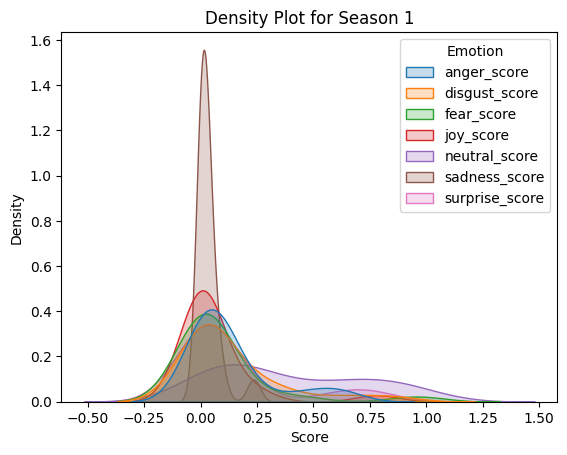

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("../test_21.csv")

# Filter the dataframe to include only rows with 'Season 1'
season_1_data = data[data['Season'] == 'Season 1']

# Melt the filtered dataframe to convert it to long format
melted_data = pd.melt(season_1_data, id_vars=['Season'], value_vars=['anger_score', 'disgust_score', 'fear_score', 'joy_score', 'neutral_score', 'sadness_score', 'surprise_score'], var_name='Emotion', value_name='Score')

# Plot a density plot
sns.kdeplot(data=melted_data, x='Score', hue='Emotion', fill=True)

# Add labels to the plot
plt.xlabel('Score')
plt.ylabel('Density')

plt.title('Density Plot for Season 1')

plt.show()


TypeError: 'NoneType' object is not iterable

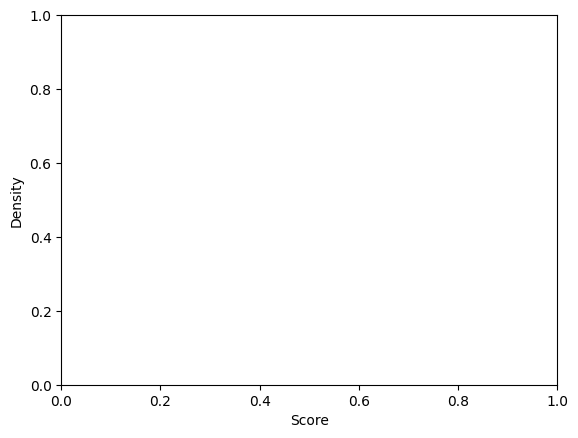

In [31]:
#test: when having loaded more in test with season 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("../test_21.csv")

# Filter the dataframe to include only rows with 'Season 2'
season_2_data = data[data['Season'] == 'Season 2']

# Melt the filtered dataframe to convert it to long format
melted_data = pd.melt(season_2_data, id_vars=['Season'], value_vars=['anger_score', 'disgust_score', 'fear_score', 'joy_score', 'neutral_score', 'sadness_score', 'surprise_score'], var_name='Emotion', value_name='Score')

# Plot a density plot
sns.kdeplot(data=melted_data, x='Score', hue='Emotion', fill=True)

# Add labels to the plot
plt.xlabel('Score')
plt.ylabel('Density')

plt.title('Density Plot for Season 2')

plt.show()
